# Exercise 4: recommender System

In [1]:
#check if notebook runs in colab
import sys
IN_COLAB = 'google.colab' in sys.modules
print('running in Colab:',IN_COLAB)
path='..'
if IN_COLAB:
  #in colab, we need to clone the data from the repo
  !git clone https://github.com/keuperj/DataScienceSS20.git
  path='DataScienceSS20'

running in Colab: False


## Code from the lecture

In [2]:
#read data to DataFrames
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(path+'/DATA/movielens100k/u.user', sep='|', names=u_cols, encoding = "ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(path+'/DATA/movielens100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")

m_cols=['movie_id', 'title', 'release date', 'video release date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv(path+'/DATA/movielens100k/u.item', sep='|', names=m_cols ,encoding = "ISO-8859-1" )

In [3]:
def getTopN(movie_id,N=5):
    return D[movie_id,:].argsort()[-N:]

def getIDbyName(name):
    if np.size(movies.movie_id[movies.title.str.contains(name)]) > 0:
        m = int(movies.movie_id[movies.title.str.contains(name)][:1]), str(movies.title[movies.title.str.contains(name)][:1])
        return m[0]-1
    else:
        return -1
    
def getNameByID(IDs):
    res=movies.iloc[IDs]
    return res.title

def CII(title):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN(getIDbyName(title)))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
        
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

In [4]:
#gerate matrix (this can be done more efficiently!)
R=np.zeros((np.shape(users)[0],np.shape(movies)[0]))
for i in range(np.shape(ratings)[0]):
    R[ratings['user_id'][i]-1, ratings['movie_id'][i]-1]=ratings['rating'][i]

In [5]:
import scipy.spatial
D=scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(R.T, metric='cosine'))
D=np.abs(np.nan_to_num( D-1)) #dist to similarity 
np.fill_diagonal(D,0) #set self-dist to zero

## 4.1 Alternative Distance Measures
Implement a different distance measure, e.g. eucledian and compare the ressults.

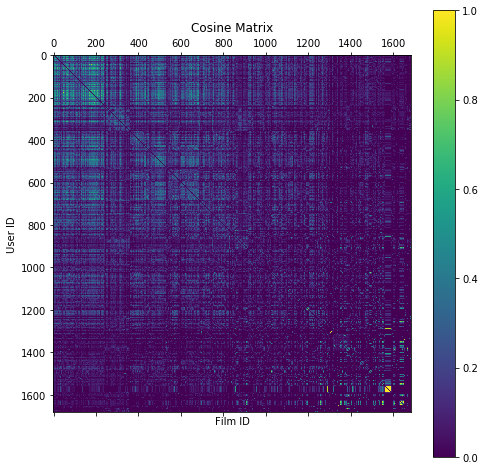

In [6]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
#show matrix    
plt.matshow(D)
plt.title('Cosine Matrix')
plt.xlabel('Film ID')
plt.ylabel('User ID')
plt.colorbar()

In [7]:
D=scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(R.T, metric='euclidean'))
D=np.abs(np.nan_to_num( D-1)) #dist to similarity 
np.fill_diagonal(D,0) #set self-dist to zero

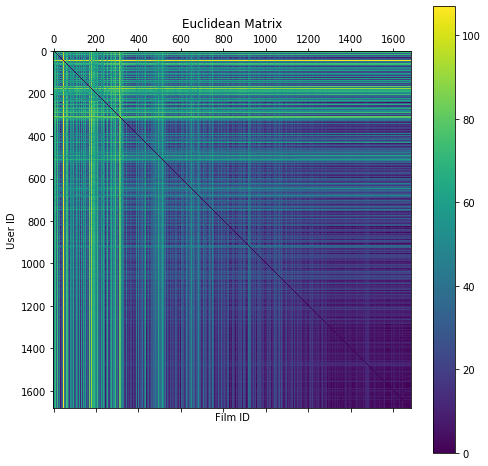

In [8]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
#show matrix    
plt.matshow(D)
plt.title('Euclidean Matrix')
plt.xlabel('Film ID')
plt.ylabel('User ID')
plt.colorbar()

## 4.2 Baseline Results
Implement and compare results of
* random recommendations
* allways recommending the top 5 movies (over all users)

In [9]:
D=scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(R.T, metric='cosine'))
D=np.abs(np.nan_to_num( D-1)) #dist to similarity 
np.fill_diagonal(D,0) #set self-dist to zero
print('Top 5 of Cosine recommendation')
CII("Titanic")

Top 5 of Cosine recommendation
recommending movies for: 'Titanic (1997)'


271      Good Will Hunting (1997)
257                Contact (1997)
314              Apt Pupil (1998)
750    Tomorrow Never Dies (1997)
299          Air Force One (1997)
Name: title, dtype: object

In [10]:
D=scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(R.T, metric='euclidean'))
D=np.abs(np.nan_to_num( D-1)) #dist to similarity 
np.fill_diagonal(D,0) #set self-dist to zero
print('Top 5 of Euclidean recommendation')
CII("Titanic")

Top 5 of Euclidean recommendation
recommending movies for: 'Titanic (1997)'


49                     Star Wars (1977)
99                         Fargo (1996)
126               Godfather, The (1972)
97     Silence of the Lambs, The (1991)
173      Raiders of the Lost Ark (1981)
Name: title, dtype: object

## 4.3 SVD
Implement the SVD approach. Hints: 
* use numpy.linalg.svd()
* apply SVD on $R$
* plot the singular values and decide where to cut off the reconstruction
* reconstruct R and evaluate $R'$
* compute the distance between two movies using $R'$


In [12]:
U,S,V = np.linalg.svd(R)

(array([909.,  28.,   3.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.64335756,  64.64238406, 128.64141056, 192.64043707,
        256.63946357, 320.63849007, 384.63751657, 448.63654307,
        512.63556957, 576.63459607, 640.63362257]),
 <a list of 10 Patch objects>)

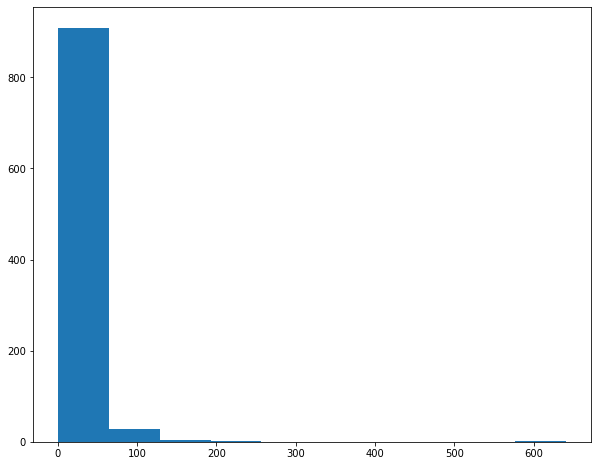

In [15]:
U
plt.hist(S)

In [73]:
#now reconstruct with loss, using only th first 2 of 4 singular values
R1 = np.dot(U[:,:150]*S[:150],V[:150,:])
R1

array([[ 4.90793439e+00,  3.40724465e+00,  2.25374885e+00, ...,
        -2.04228021e-02,  4.00591444e-02,  1.83749399e-01],
       [ 3.45906905e+00, -1.72293069e-01,  3.56022054e-01, ...,
         7.43957871e-03, -3.37235650e-03, -1.61976348e-02],
       [-2.60315394e-01, -2.91024893e-01, -3.89245245e-01, ...,
         4.35492182e-02,  1.77074354e-02, -5.25395509e-02],
       ...,
       [ 3.61424594e+00, -4.40506103e-02,  4.42184124e-01, ...,
        -3.69480506e-03,  2.93976391e-02, -7.41802205e-03],
       [ 1.13368999e-01,  2.15733429e-01,  2.02085777e-01, ...,
        -5.25987185e-03, -1.52186775e-02, -2.57989923e-02],
       [ 3.91004651e-01,  3.44462872e+00,  1.40980733e+00, ...,
        -8.39242342e-03,  2.25410156e-03,  1.81156865e-03]])

In [74]:
D=scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(R1.T, metric='cosine'))
D=np.abs(np.nan_to_num( D-1)) #dist to similarity 
np.fill_diagonal(D,0) #set self-dist to zero
print('Top 5 of Cosine recommendation')
CII("Titanic")

Top 5 of Cosine recommendation
recommending movies for: 'Titanic (1997)'


271      Good Will Hunting (1997)
750    Tomorrow Never Dies (1997)
314              Apt Pupil (1998)
257                Contact (1997)
749                Amistad (1997)
Name: title, dtype: object

In [89]:
 def CosineDist(a,b):
    res =  a.dot(b)
    norm = np.linalg.norm(a)*np.linalg.norm(b)
    if norm > 0: #norm ist null wenn keine Berwerung existiert -> Fallunterscheidung
        return res/norm
    else:
        return res

In [93]:
def getNameByID(IDs):
    res=movies.iloc[IDs]
    return res.title

In [96]:
mov1 = 10
print(getNameByID(mov1))
mov2 = 18
print(getNameByID(mov2))
CosineDist(R1[:,mov1],R1[:,mov2])

Seven (Se7en) (1995)
Antonia's Line (1995)


0.1325383939215394